# Análisis Exploratorio de Datos
Vamos a realizar los siguientes analisis:

 - Estadísticas descriptivas y distribución de puntajes.

 - Distribución porcentual de variables categóricas.

Estadísticas descriptivas y distribución de puntajes


Proposito


Analizar la tendencia central y la dispersion de los puntajes. Visualizacion mediante histogramas para detectar la posible presencia de algunos en los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/interim/2022_Censo_Estudiantes.csv',sep=',', decimal=".")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403468 entries, 0 to 403467
Columns: 232 entries, c_jurisdiccion to jurisdiccion
dtypes: float64(4), int64(4), object(224)
memory usage: 714.1+ MB


In [4]:
df.head(5)

,c_jurisdiccion,ID1,idseccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp,region,jurisdiccion
0,90,36008003600800,1,655437,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.372449,Medio,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
1,90,36008003600800,1,655438,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.716539,Bajo,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
2,90,36008003600800,1,655439,Estatal,Urbano,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Secundaria incompleta,NaN,,NOA,Tucumán
3,90,36008003600800,1,655440,Estatal,Urbano,NaN,NaN,NaN,NaN,...,0.122361,Medio,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
4,90,36008003600800,1,655441,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.654602,Bajo,NaN,NaN,NaN,No fue a la escuela,NaN,,NOA,Tucumán


In [5]:
# Variables categóricas que tienen etiquetas recodificadas y pueden tener ruido
vars_a_limpiar_etiquetas = ['ldesemp', 'mdesemp', 'NSE_nivel', 'sector', 'ambito']

print("--- Normalizando Etiquetas (Eliminando Espacios Invisibles) ---")

for col in vars_a_limpiar_etiquetas:
    # 1. Forzar a tipo string
    df[col] = df[col].astype(str)
    
    # 2. Aplicar strip() para eliminar espacios en blanco al inicio y final
    df[col] = df[col].str.strip()
    
    # 3. Eliminar posibles dobles espacios internos (opcional, pero seguro)
    df[col] = df[col].str.replace(' +', ' ', regex=True)

    # 4. Volver a convertir a tipo category (mejor para el análisis)
    df[col] = df[col].astype('category')
    
    print(f"✅ Columna '{col}' normalizada. Ahora tiene {df[col].nunique()} categorías únicas.")

print("--- Normalización de Etiquetas Finalizada ---")

--- Normalizando Etiquetas (Eliminando Espacios Invisibles) ---
✅ Columna 'ldesemp' normalizada. Ahora tiene 5 categorías únicas.
✅ Columna 'mdesemp' normalizada. Ahora tiene 5 categorías únicas.
✅ Columna 'NSE_nivel' normalizada. Ahora tiene 4 categorías únicas.
✅ Columna 'sector' normalizada. Ahora tiene 2 categorías únicas.
✅ Columna 'ambito' normalizada. Ahora tiene 2 categorías únicas.
--- Normalización de Etiquetas Finalizada ---


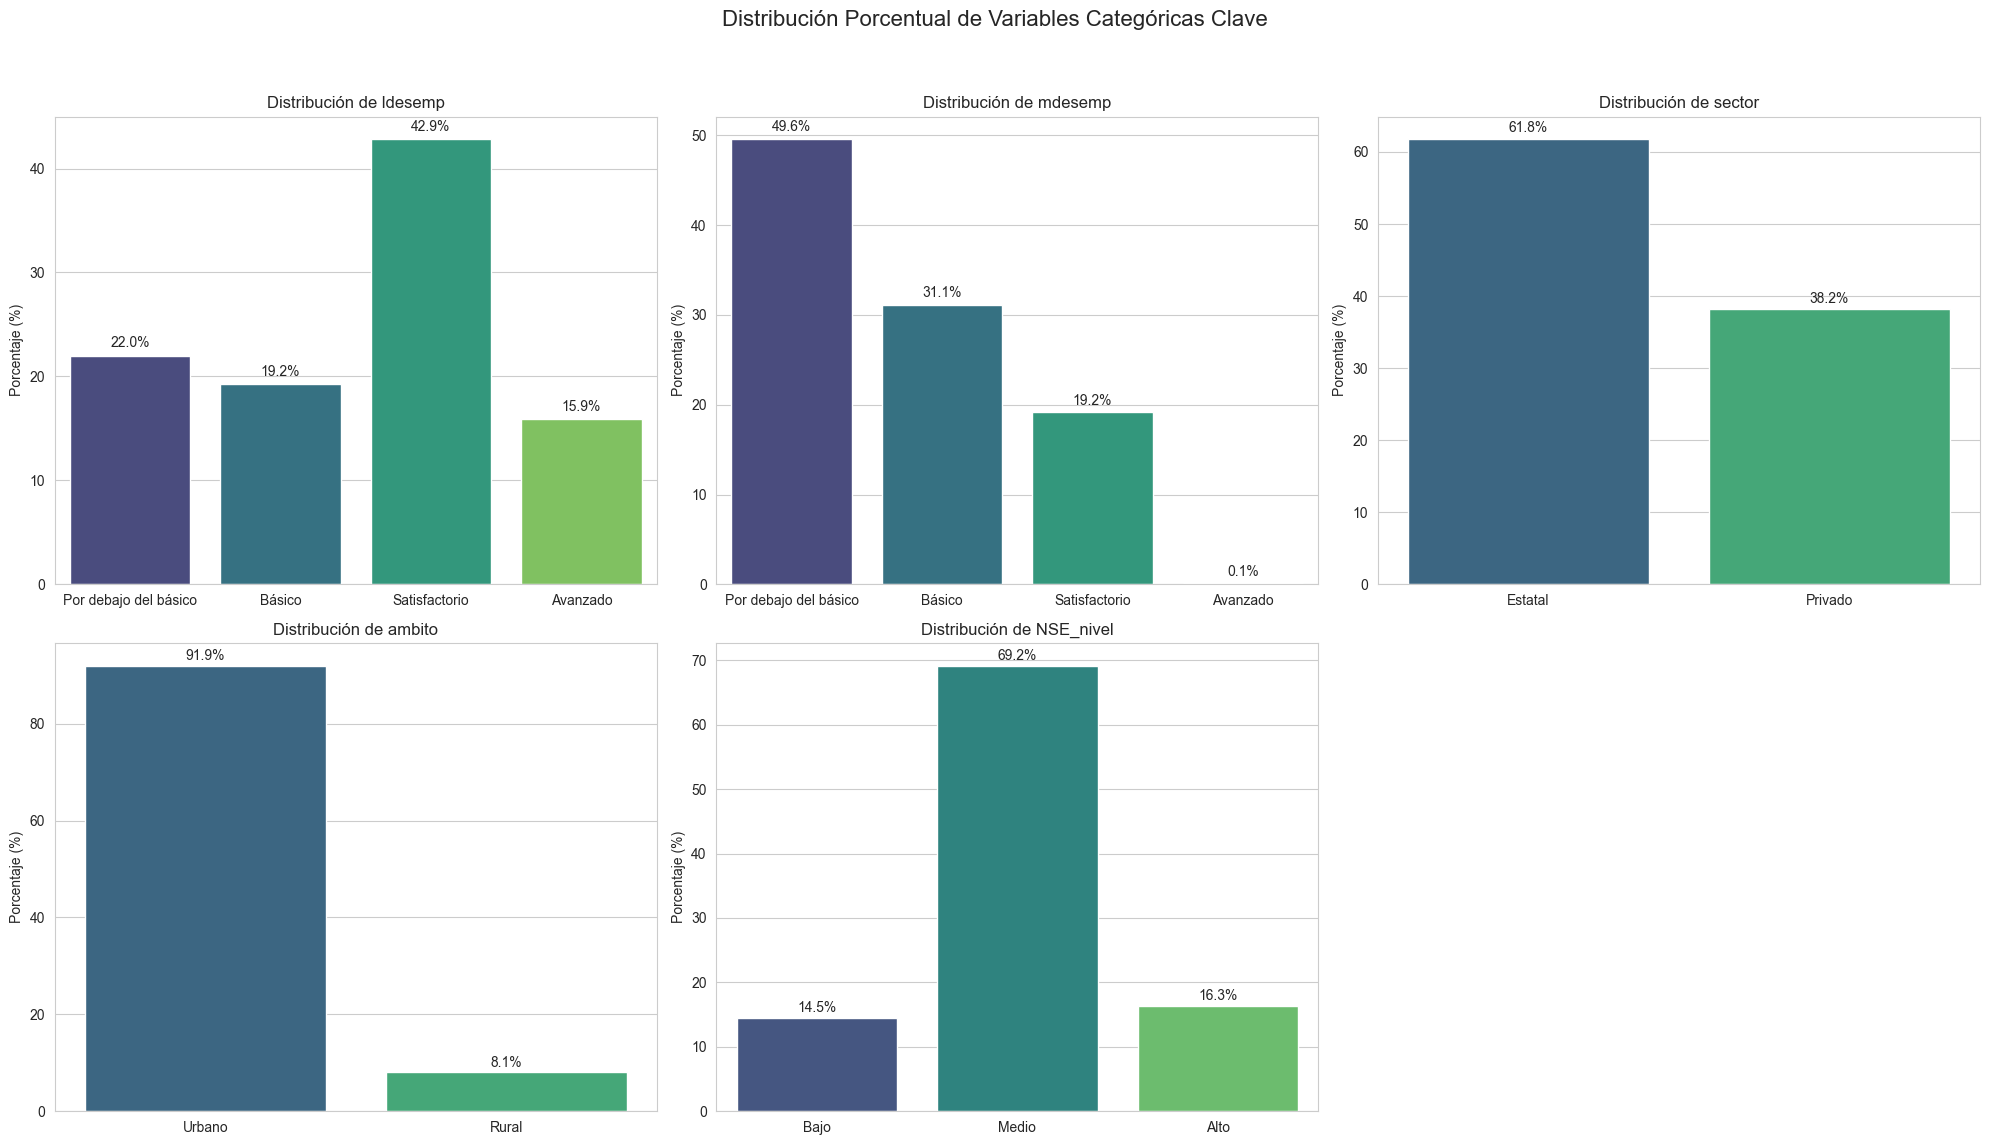

In [11]:
# Variables categóricas clave ya recodificadas
vars_categoricas_eda = ['ldesemp', 'mdesemp', 'sector', 'ambito', 'NSE_nivel']

# Crear la figura y los ejes para los 5 gráficos
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() 
fig.suptitle('Distribución Porcentual de Variables Categóricas Clave', fontsize=16)

for i, col in enumerate(vars_categoricas_eda):
    
    # 1. Convertir a string y eliminar Nulos (NaN) para asegurar el conteo
    temp_data = df[col].astype(str).dropna()
    
    # 2. Calcular los porcentajes y ordenarlos si es necesario
    # Excluir 'nan' si quedaron como string
    plot_data = temp_data[temp_data != 'nan'].value_counts(normalize=True).mul(100)

    # Ordenar específicamente las variables ordinales para mejor visualización
    if col in ['ldesemp', 'mdesemp']:
        orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
        plot_data = plot_data.reindex(orden_desemp)
    elif col == 'NSE_nivel':
        orden_nse = ['Bajo', 'Medio', 'Alto']
        plot_data = plot_data.reindex(orden_nse)

    # Crear el gráfico de barras
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette="viridis", hue=plot_data.index, legend=False)
    
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].set_xlabel(None)
    
    # Añadir etiquetas de porcentaje en las barras
    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2., 
                    height + 0.5, 
                    f'{height:.1f}%', 
                    ha='center', 
                    va='bottom')

# Ocultar el último eje no utilizado
fig.delaxes(axes[5])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Estadísticas Descriptivas de Puntajes (Ignorando NaN) ---
            lpuntaje       mpuntaje    NSE_puntaje
count  391291.000000  386779.000000  349871.000000
mean      515.163826     474.615813       0.282872
std       115.211869      68.370188       0.674014
min       160.253110     292.031340      -2.116088
25%       429.515135     423.734800      -0.101794
50%       512.628540     466.085660       0.395518
75%       599.367920     519.790495       0.781679
max       822.416380     691.073300       2.677012


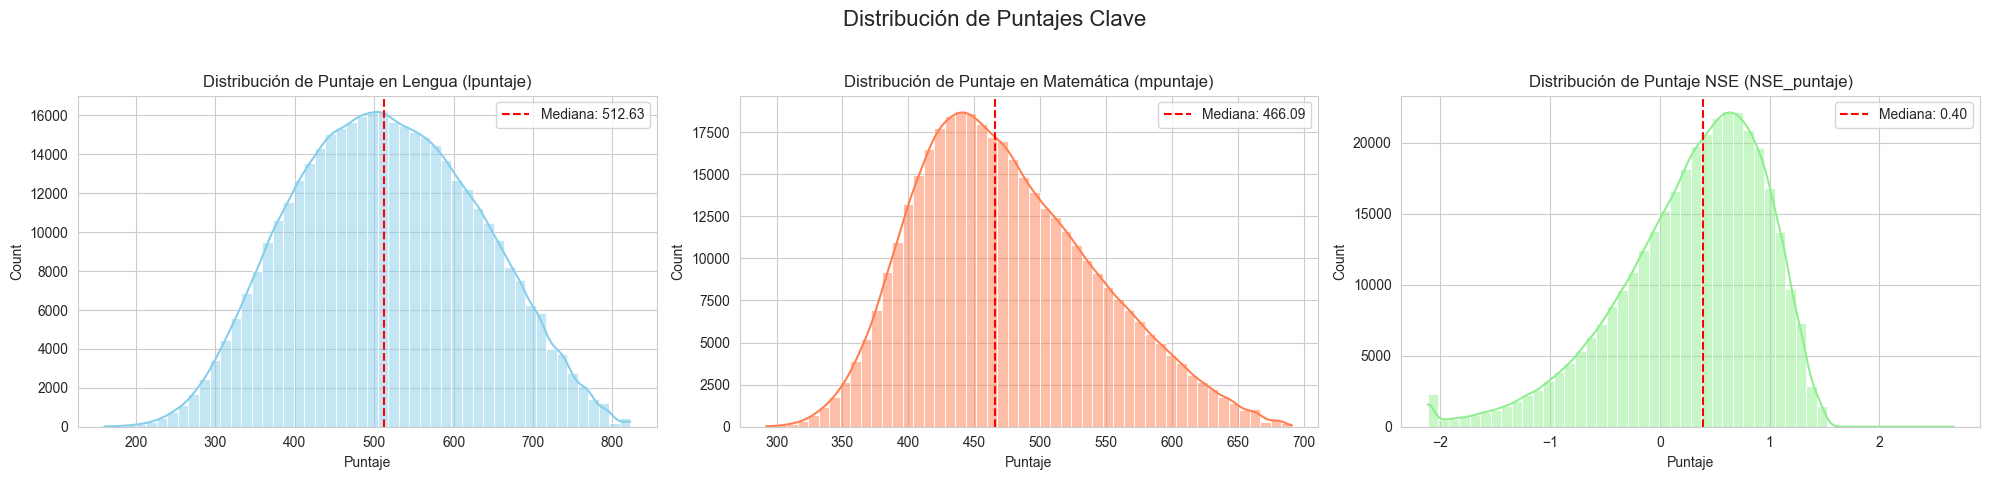

In [6]:
# Configuración de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# 1. Estadísticas Descriptivas (Ignorando NaN)
print("--- Estadísticas Descriptivas de Puntajes (Ignorando NaN) ---")
print(df[['lpuntaje', 'mpuntaje', 'NSE_puntaje']].describe())

# 2. Visualización de Distribuciones (Histogramas y KDE)

# Crear la figura y los ejes para los 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribución de Puntajes Clave', fontsize=16)

# Histograma de Puntaje de Lengua
sns.histplot(df['lpuntaje'].dropna(), kde=True, ax=axes[0], color='skyblue', bins=50)
axes[0].set_title('Distribución de Puntaje en Lengua (lpuntaje)')
axes[0].set_xlabel('Puntaje')
axes[0].axvline(df['lpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["lpuntaje"].median():.2f}')
axes[0].legend()

# Histograma de Puntaje de Matemática
sns.histplot(df['mpuntaje'].dropna(), kde=True, ax=axes[1], color='coral', bins=50)
axes[1].set_title('Distribución de Puntaje en Matemática (mpuntaje)')
axes[1].set_xlabel('Puntaje')
axes[1].axvline(df['mpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["mpuntaje"].median():.2f}')
axes[1].legend()

# Histograma de Puntaje NSE
sns.histplot(df['NSE_puntaje'].dropna(), kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title('Distribución de Puntaje NSE (NSE_puntaje)')
axes[2].set_xlabel('Puntaje')
axes[2].axvline(df['NSE_puntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["NSE_puntaje"].median():.2f}')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Fase 5: Análisis Bivariado Categórico vs. Numérico (Preparación para ANOVA)
El objetivo de esta fase es visualizar cómo las variables categóricas de contexto (ámbito, sector, NSE) se relacionan con las medias de puntajes (lpuntaje, mpuntaje). Usaremos gráficos de caja (boxplots), que son ideales para este tipo de análisis, ya que muestran la media, la mediana, la dispersión y los valores atípicos para cada grupo.

5.1. Rendimiento por Contexto (Boxplots)
Propósito
Detectar visualmente las brechas de rendimiento. Por ejemplo, si el puntaje mediano del Sector Privado es significativamente más alto que el del Sector Estatal, o si existe una gran diferencia entre los niveles NSE.

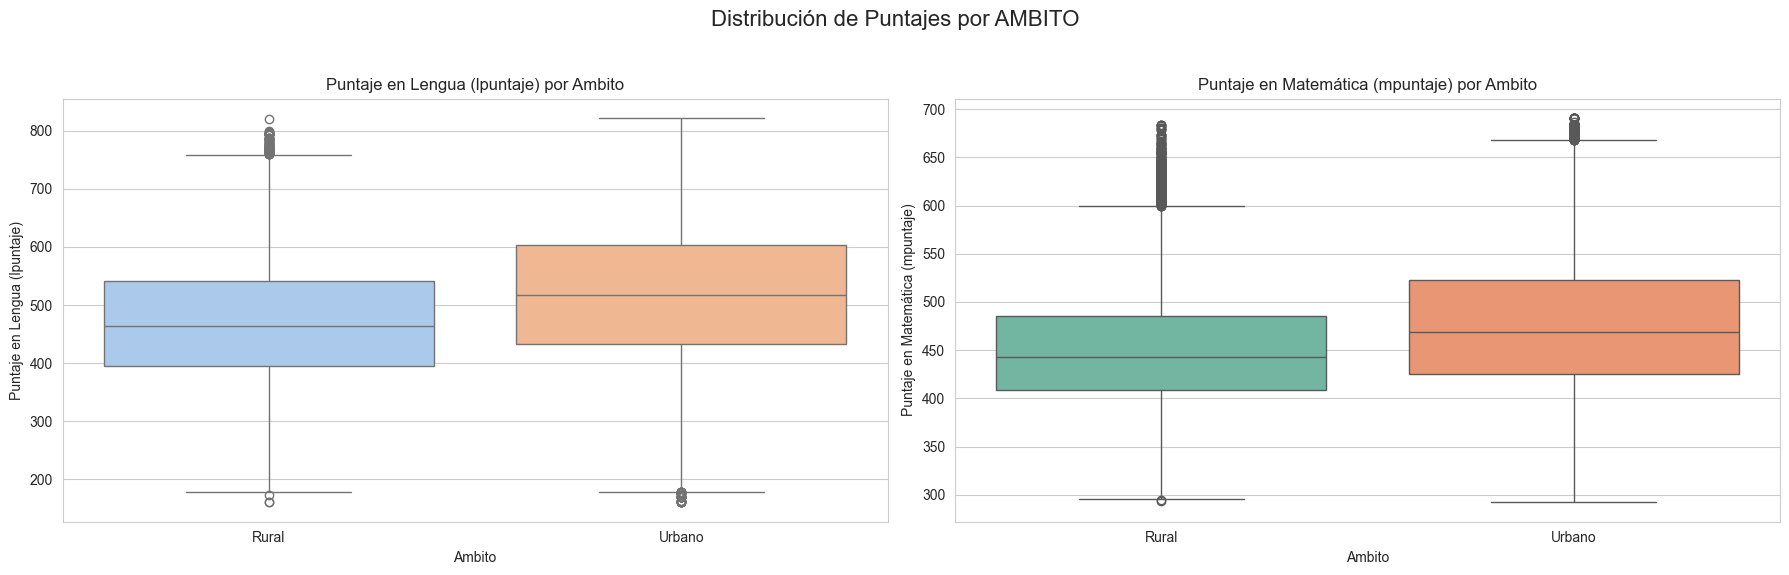

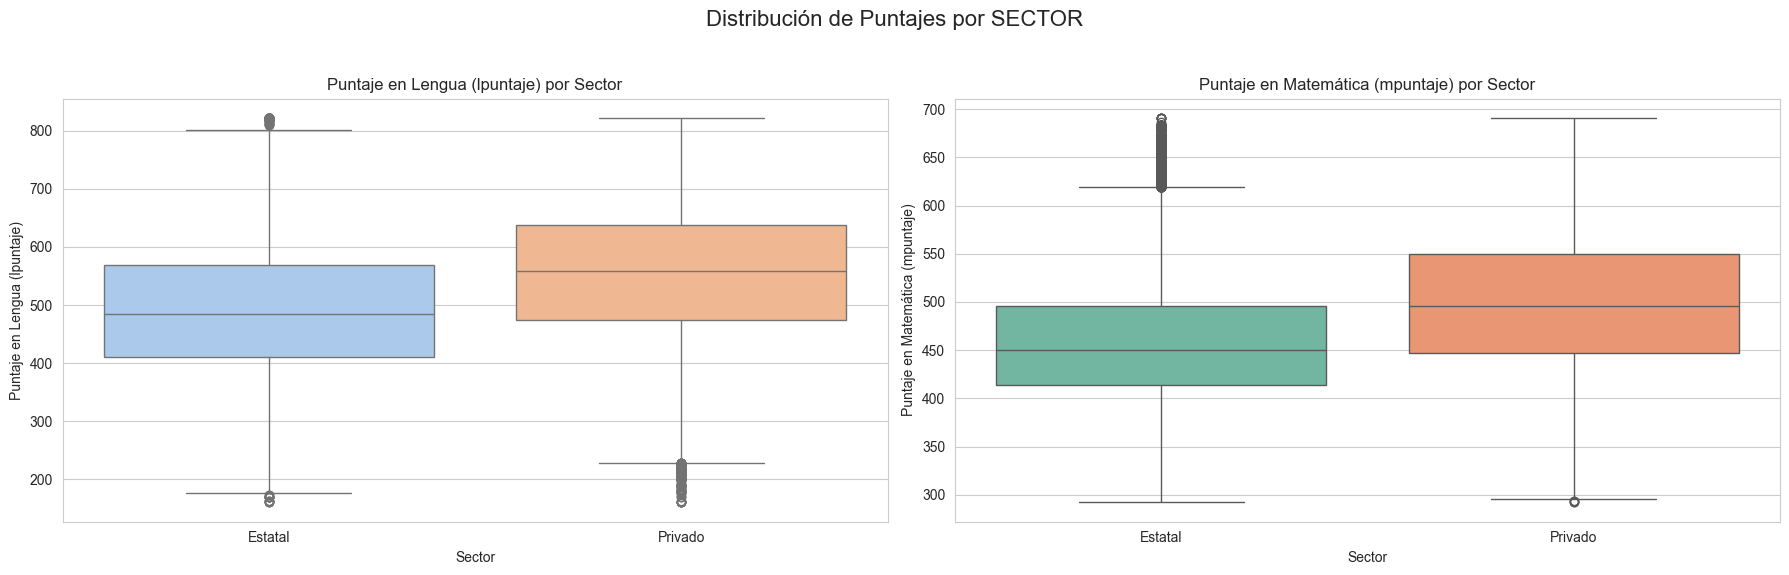

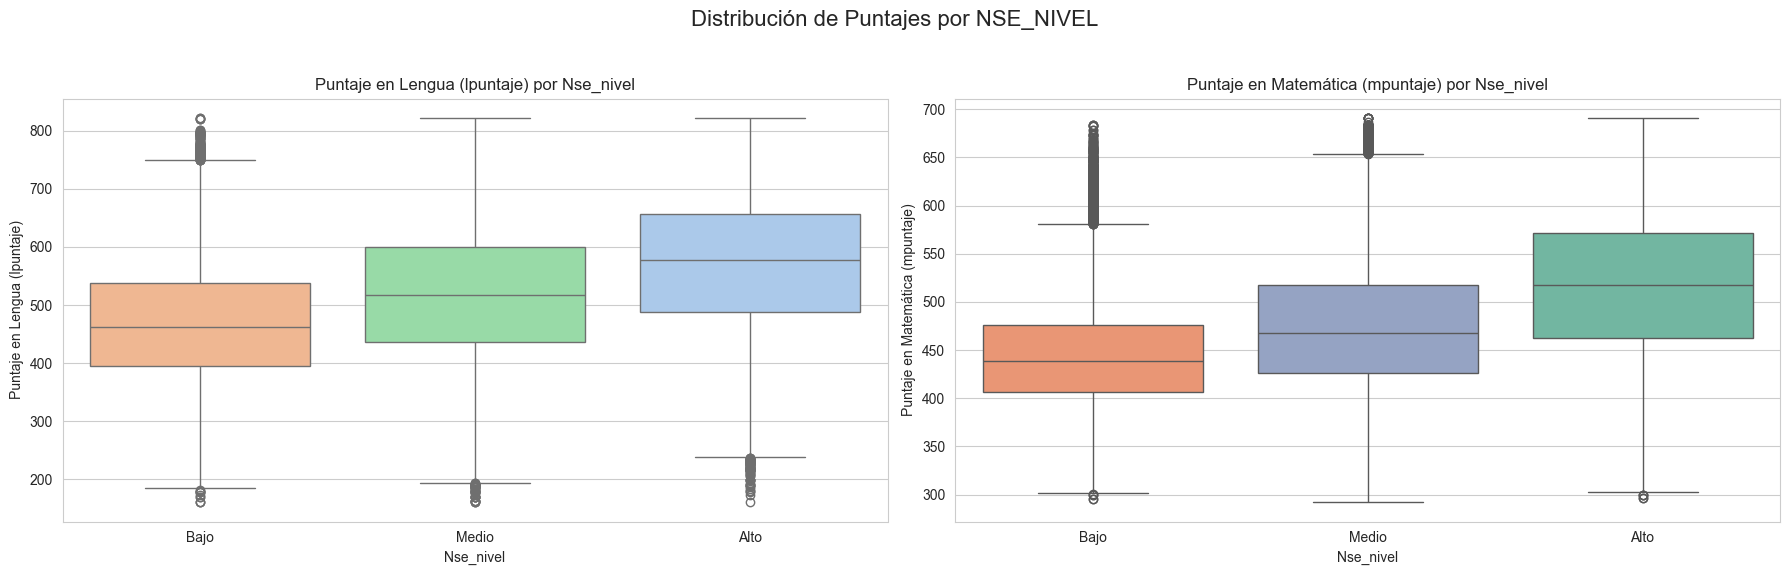

In [13]:
# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

variables_contexto = ['ambito', 'sector', 'NSE_nivel']
puntajes = ['lpuntaje', 'mpuntaje']

for contexto in variables_contexto:
    # 1. Crear figura y ejes para Lengua y Matemática
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Distribución de Puntajes por {contexto.upper()}', fontsize=16)

    # Definir el orden para las variables ordinales/nominales
    orden_contexto = None
    if contexto == 'NSE_nivel':
        orden_contexto = ['Bajo', 'Medio', 'Alto']
    
    # 2. Generar Boxplot para Puntaje en Lengua (lpuntaje)
    sns.boxplot(x=contexto, y='lpuntaje', data=df, order=orden_contexto, ax=axes[0], palette="pastel", hue=contexto, legend=False)
    axes[0].set_title(f'Puntaje en Lengua (lpuntaje) por {contexto.capitalize()}')
    axes[0].set_ylabel('Puntaje en Lengua (lpuntaje)')
    axes[0].set_xlabel(contexto.capitalize())

    # 3. Generar Boxplot para Puntaje en Matemática (mpuntaje)
    sns.boxplot(x=contexto, y='mpuntaje', data=df, order=orden_contexto, ax=axes[1], palette="Set2", hue=contexto, legend=False)
    axes[1].set_title(f'Puntaje en Matemática (mpuntaje) por {contexto.capitalize()}')
    axes[1].set_ylabel('Puntaje en Matemática (mpuntaje)')
    axes[1].set_xlabel(contexto.capitalize())

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

5.2. Rendimiento por Jurisdicción


Propósito


Analizar la variabilidad en los puntajes promedios entre las 24 jurisdicciones. Esto es el paso final de preparación antes del ANOVA. Para hacerlo, primero debemos asegurarnos de que el Mapeo de Jurisdicción (de la Fase 3) se haya aplicado correctamente al DataFrame limpio.

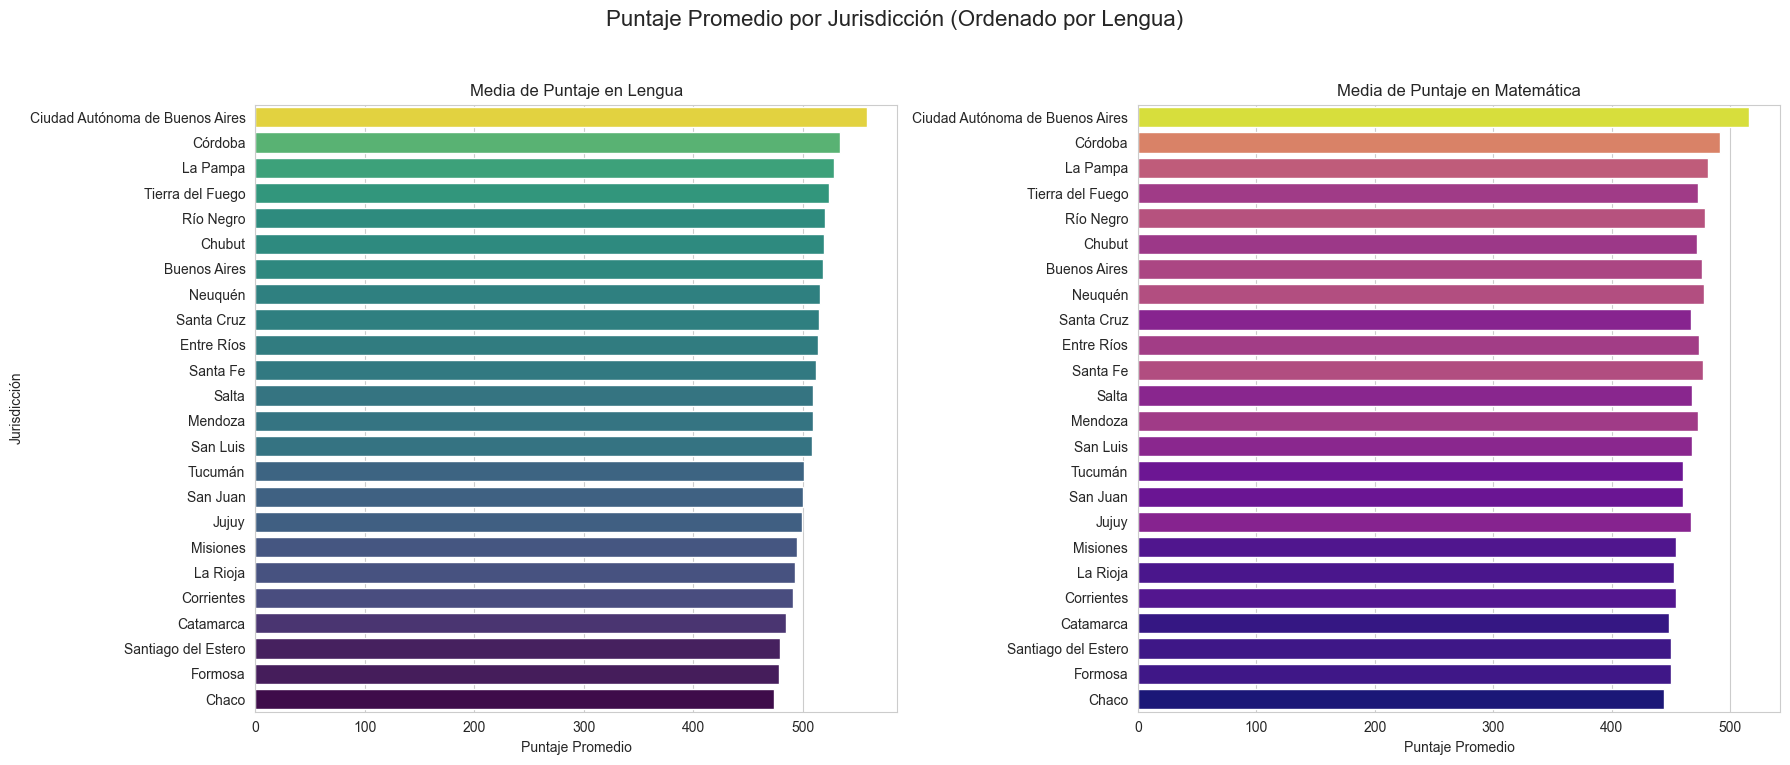

In [14]:
# Mapeo de jurisdicción ya aplicado
if 'jurisdiccion' not in df.columns:
    print("🛑 ERROR: La columna 'jurisdiccion' no se encuentra. Asegúrate de haber ejecutado la Fase 3 (Mapeo de Jurisdicción) en el DataFrame limpio.")
    # Si la columna no está, el resto del código fallará.
else:
    # 1. Calcular la media de puntaje por jurisdicción
    df_media_jurisdiccion = df.groupby('jurisdiccion')[['lpuntaje', 'mpuntaje']].mean().reset_index()

    # 2. Ordenar las jurisdicciones por el puntaje promedio de Lengua
    df_media_jurisdiccion = df_media_jurisdiccion.sort_values(by='lpuntaje', ascending=False)
    
    # 3. Visualización: Gráfico de Barras para Puntaje Promedio por Jurisdicción

    # Crear la figura y los ejes
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Puntaje Promedio por Jurisdicción (Ordenado por Lengua)', fontsize=16)

    # Gráfico de Lengua (lpuntaje)
    sns.barplot(x='lpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[0], palette="viridis", hue='lpuntaje', legend=False)
    axes[0].set_title('Media de Puntaje en Lengua')
    axes[0].set_xlabel('Puntaje Promedio')
    axes[0].set_ylabel('Jurisdicción')

    # Gráfico de Matemática (mpuntaje)
    sns.barplot(x='mpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[1], palette="plasma", hue='mpuntaje', legend=False)
    axes[1].set_title('Media de Puntaje en Matemática')
    axes[1].set_xlabel('Puntaje Promedio')
    axes[1].set_ylabel('') # No se repite la etiqueta del eje Y

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---
ldesemp    Por debajo del básico  Básico  Satisfactorio  Avanzado
NSE_nivel                                                        
Bajo                       31.95   24.00          34.43      5.87
Medio                      19.40   18.80          43.86     15.18
Alto                       11.46   12.09          44.85     29.56


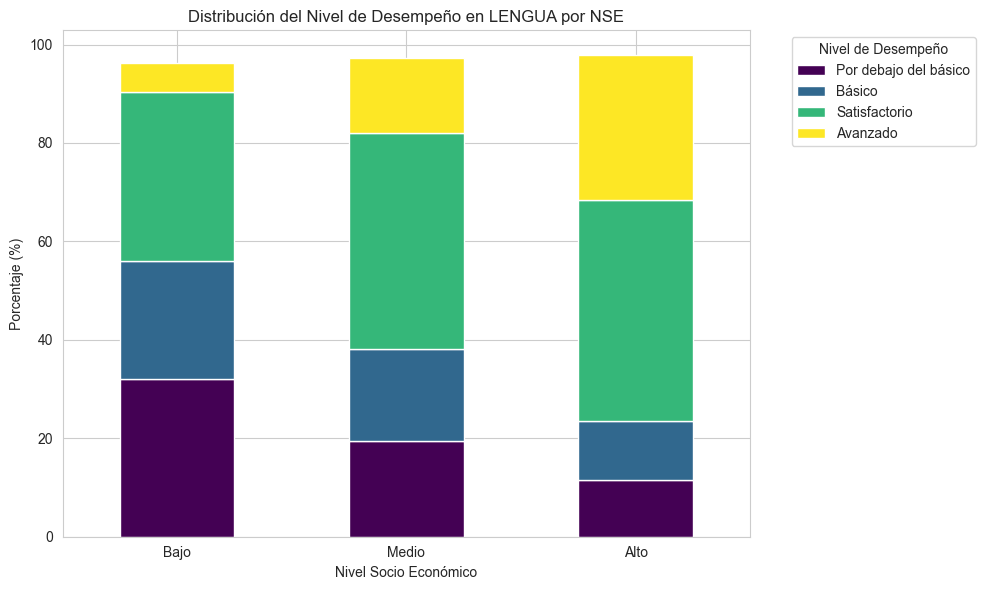

In [15]:
# Definir el orden correcto para las categorías de desempeño
orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
orden_nse = ['Bajo', 'Medio', 'Alto']

# --- A. Tabla de Contingencia (Lengua vs. NSE) ---
# Calcular la distribución porcentual dentro de cada Nivel Socio Económico (axis=0)
# Esto responde: Del total de estudiantes en un NSE, ¿cómo se distribuyen en desempeño?
tabla_lengua_nse = pd.crosstab(df['NSE_nivel'], df['ldesemp'], normalize='index') * 100

print("--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---")
print(tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).round(2))

# --- B. Visualización Gráfico de Barras Apiladas ---
plt.figure(figsize=(12, 6))
tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del Nivel de Desempeño en LENGUA por NSE')
plt.xlabel('Nivel Socio Económico')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de Desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


--- Distribución Porcentual de Desempeño en Lengua por Sector de Gestión ---
ldesemp  Por debajo del básico  Básico  Satisfactorio  Avanzado
sector                                                         
Estatal                  26.54   21.43          38.37      9.99
Privado                  12.92   14.20          46.74     24.18


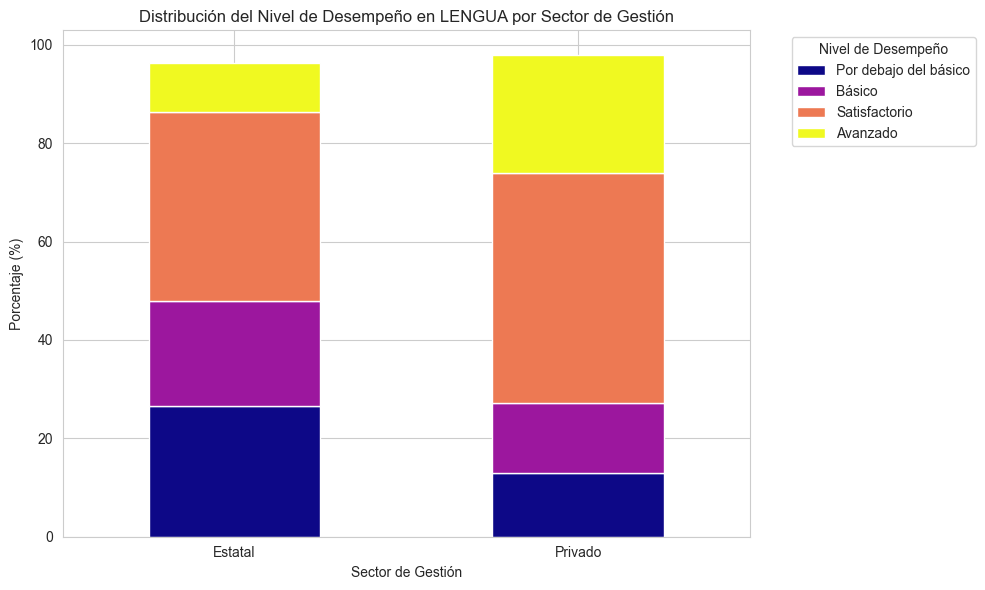

In [16]:
# --- A. Tabla de Contingencia (Lengua vs. Sector) ---
# Calcular la distribución porcentual dentro de cada Sector (axis=0)
# Esto responde: Del total de estudiantes en un Sector, ¿cómo se distribuyen en desempeño?
tabla_lengua_sector = pd.crosstab(df['sector'], df['ldesemp'], normalize='index') * 100

print("\n--- Distribución Porcentual de Desempeño en Lengua por Sector de Gestión ---")
print(tabla_lengua_sector.reindex(columns=orden_desemp).round(2))

# --- B. Visualización Gráfico de Barras Apiladas ---
plt.figure(figsize=(12, 6))
tabla_lengua_sector.reindex(columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='plasma', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del Nivel de Desempeño en LENGUA por Sector de Gestión')
plt.xlabel('Sector de Gestión')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de Desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()